<h3>k-nearest neighbors algorithm</h3>

An object is classified by a plurality vote of its neighbours, with the object being assigned to the class most common among its k nearest neighbours (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbour.

Most often used for classification, but can also be generalised for regression.

In [4]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"K=5 Test Accuracy: {accuracy:.2f}")

K=5 Test Accuracy: 0.94


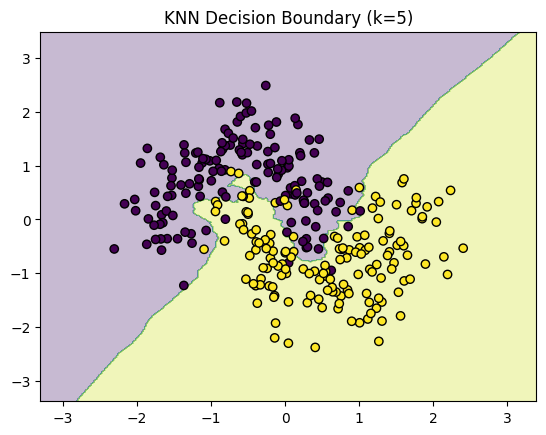

In [6]:
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(knn, X_scaled, y, "KNN Decision Boundary (k=5)")

Try Different kk Values

K=1 → Accuracy: 0.91


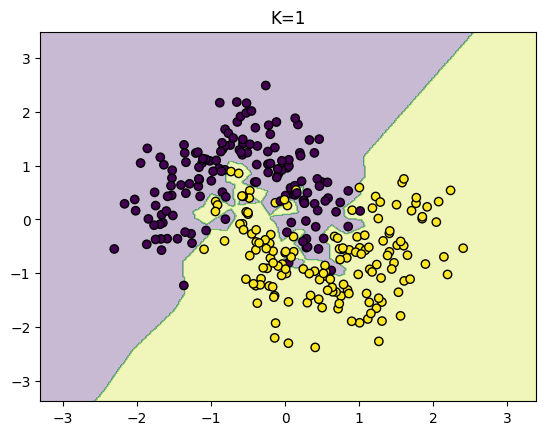

K=3 → Accuracy: 0.94


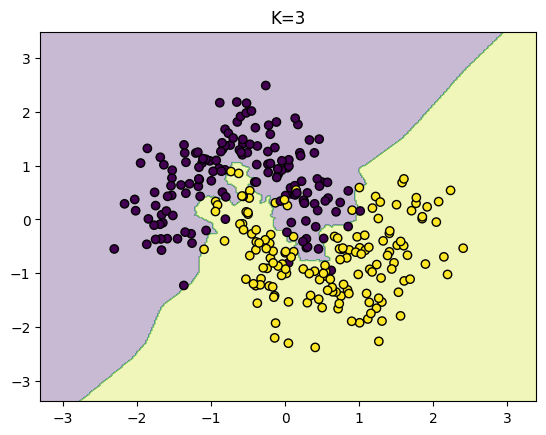

K=5 → Accuracy: 0.94


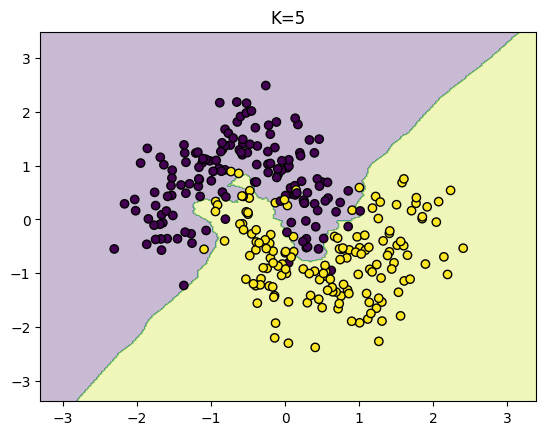

K=10 → Accuracy: 0.94


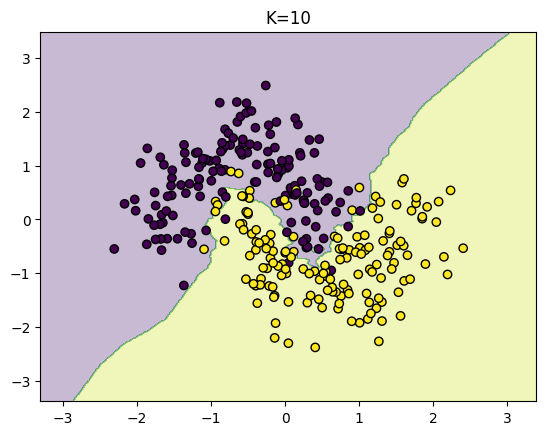

K=20 → Accuracy: 0.93


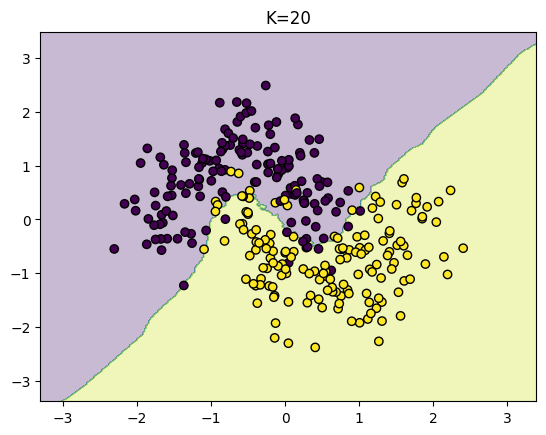

In [7]:
for k in [1, 3, 5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"K={k} → Accuracy: {acc:.2f}")
    plot_decision_boundary(knn, X_scaled, y, f"K={k}")

k=3 to k=10 seems to hit the bias-variance sweet spot; increasingly more clean, balanced curves

k=1 overfits: too sensitive to noise; jagged, tight, overly complex boundaries

k=20 starts to underfit (too much averaging); smoother, with more blended class regions

<b>🧪 Tune using cross-validation to find optimal k</b>

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 31)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_scaled, y)

print(f"Best k: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

Best k: 6
Best cross-validated accuracy: 0.9300


GridSearchCV uses cross-validation accuracy:

    It evaluates each k across multiple folds of the training data (e.g., 5-fold CV).

    This gives a more reliable estimate of generalization than a single train-test split.

    Earlier 0.94 accuracy for k=3 to k=10 was from one test split, which may be slightly lucky or optimistic.